# Homelessness dataset

Este dataset contiene estimaciones de las personas sin hogar en cada estado de EE.UU. en 2018.
- La columna individual es el número de personas sin hogar que no forman parte de una familia con hijos.
- La columna family_members es el número de personas sin hogar que forman parte de una familia con hijos.
- La columna state_pop es la población total del estado.

# Objetivo
Centralizar todos los conceptos del curso de Manipulacion de datos con pandas
Dejar un backup de los concpetos vistos en el capitulo 1 del curso "manipulaicon de datos con pandas"

En este notebook los conceptos que se presentan son
- analisis exploratorio: info, head, shape, describe
- atributos de un dataframe: index, columns, values
- ordenar filas: sort_values
- subconjuntos de datos por columnas
- filtrar por filas: operadores logicos
- subconjuntos de datos por filas : isin
- añadir nuevas columnas

In [101]:
import pandas as pd

In [102]:
df_hml = pd.read_csv('homelessness.csv')
df_hml.shape

(51, 6)

# Analisis Exploratorio

In [103]:
df_hml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [104]:
df_hml.describe()

,Unnamed: 0,individuals,family_members,state_pop
count,51.000000,51.000000,51.000000,5.100000e+01
mean,25.000000,7225.784314,3504.882353,6.405637e+06
std,14.866069,15991.025083,7805.411811,7.327258e+06
min,0.000000,434.000000,75.000000,5.776010e+05
25%,12.500000,1446.500000,592.000000,1.777414e+06
50%,25.000000,3082.000000,1482.000000,4.461153e+06
75%,37.500000,6781.500000,3196.000000,7.340946e+06
max,50.000000,109008.000000,52070.000000,3.946159e+07


In [105]:
df_hml.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


# atributos de un dataframe
### Un df consta de 3 componentes almacenados como atributos


In [106]:
print(df_hml.columns) # nombres de las columnas
df_hml.values # matriz numpy bidimensional
df_hml.index # indice por filas (numero o tags)

Index(['Unnamed: 0', 'region', 'state', 'individuals', 'family_members',
       'state_pop'],
      dtype='object')


RangeIndex(start=0, stop=51, step=1)

# Ordenar filas
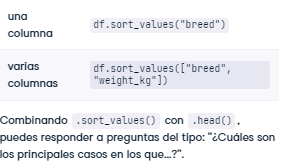

In [107]:
hml_ind = df_hml.sort_values('individuals')
print(hml_ind.head())

    Unnamed: 0              region         state  individuals  family_members  \
50          50            Mountain       Wyoming        434.0           205.0   
34          34  West North Central  North Dakota        467.0            75.0   
7            7      South Atlantic      Delaware        708.0           374.0   
39          39         New England  Rhode Island        747.0           354.0   
45          45         New England       Vermont        780.0           511.0   

    state_pop  
50     577601  
34     758080  
7      965479  
39    1058287  
45     624358  


In [108]:
hml_fam = df_hml.sort_values('family_members',ascending=False)
print(hml_fam.head())

    Unnamed: 0              region          state  individuals  \
32          32        Mid-Atlantic       New York      39827.0   
4            4             Pacific     California     109008.0   
21          21         New England  Massachusetts       6811.0   
9            9      South Atlantic        Florida      21443.0   
43          43  West South Central          Texas      19199.0   

    family_members  state_pop  
32         52070.0   19530351  
4          20964.0   39461588  
21         13257.0    6882635  
9           9587.0   21244317  
43          6111.0   28628666  


In [109]:
hml_reg_fam = df_hml.sort_values(['region','family_members'],ascending=[True,False])
print(hml_reg_fam.head())

    Unnamed: 0              region      state  individuals  family_members  \
13          13  East North Central   Illinois       6752.0          3891.0   
35          35  East North Central       Ohio       6929.0          3320.0   
22          22  East North Central   Michigan       5209.0          3142.0   
49          49  East North Central  Wisconsin       2740.0          2167.0   
14          14  East North Central    Indiana       3776.0          1482.0   

    state_pop  
13   12723071  
35   11676341  
22    9984072  
49    5807406  
14    6695497  


# Subconjuntos de datos por Columnas

In [110]:
individuals = df_hml['individuals']
print(type(individuals))

<class 'pandas.core.series.Series'>


In [111]:
state_fam = df_hml[['state','family_members']]
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [112]:
ind_state = df_hml[['individuals','state']]
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


In [113]:
df_hml[df_hml['state']== 'Alabama']['individuals']

0    2570.0
Name: individuals, dtype: float64

# Filtrar por filas
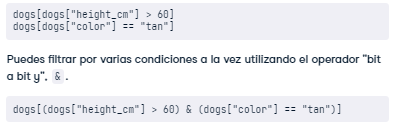

In [114]:
ind_gt_10k = df_hml[df_hml['individuals']> 10000]
ind_gt_10k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 4 to 47
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6 non-null      int64  
 1   region          6 non-null      object 
 2   state           6 non-null      object 
 3   individuals     6 non-null      float64
 4   family_members  6 non-null      float64
 5   state_pop       6 non-null      int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 336.0+ bytes


In [115]:
mountain_region = df_hml[df_hml['region']=='Mountain']
mountain_region

,Unnamed: 0,region,state,individuals,family_members,state_pop
2,2,Mountain,Arizona,7259.0,2606.0,7158024
5,5,Mountain,Colorado,7607.0,3250.0,5691287
12,12,Mountain,Idaho,1297.0,715.0,1750536
26,26,Mountain,Montana,983.0,422.0,1060665
28,28,Mountain,Nevada,7058.0,486.0,3027341
31,31,Mountain,New Mexico,1949.0,602.0,2092741
44,44,Mountain,Utah,1904.0,972.0,3153550
50,50,Mountain,Wyoming,434.0,205.0,577601


In [116]:
fam_lt_1k_pac = df_hml[(df_hml['region']== 'Pacific') & (df_hml['family_members']<1000)]
fam_lt_1k_pac

,Unnamed: 0,region,state,individuals,family_members,state_pop
1,1,Pacific,Alaska,1434.0,582.0,735139


# Subconjunto de datos por filas 
es similar a realizar un OR

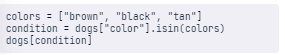

In [117]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]
mojave_hml = df_hml[df_hml['state'].isin(canu)]
print(mojave_hml)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


# Añadir nuevas columnas

In [118]:
# hallo porcentaje de personas que estan sin hogar sobre el total
df_hml['total'] = df_hml['individuals'] + df_hml['family_members'] 
df_hml['p_homeless'] = df_hml['total'] / df_hml['state_pop']
df_hml.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop,total,p_homeless
0,0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.000703
1,1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.002742
2,2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.001378
3,3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.000901
4,4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.003294
